**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KDTree
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy.linalg as ln
import numpy as np
import scipy.spatial.distance as dist
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin, SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors = 17, algorithm=None):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if (self.algorithm == "kd_tree"):
            self.tree = KDTree(self.X_train)
        
    def predict(self, X):
        if (self.algorithm == "kd_tree"):
            cl_dist, indexes = self.tree.query(X, self.n_neighbors)
        else:
            indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count.argmax(axis=1)

    def predict_proba(self, X):
        if (self.algorithm == "kd_tree"):
            cl_dist, indexes = self.tree.query(X, self.n_neighbors)
        else:
            indexes = dist.cdist(self.X_train, X).T.argsort()[:, :self.n_neighbors]
        classes = self.y_train[indexes].astype(int)
        max_val_class = int(self.y_train.max())
        classes_count = np.apply_along_axis(
            lambda x: np.bincount(x, minlength=max_val_class + 1),
            axis=1, arr=classes)
        return classes_count/(classes_count.sum(axis=1)[:, None])

    def score(self, X, y):
        y_predict = self.predict(X)
        return len((np.where(y_predict - y == 0))[0])/len(y)



**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier (n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.21 ms, sys: 269 µs, total: 1.48 ms
Wall time: 1.32 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 15 µs, sys: 3 µs, total: 18 µs
Wall time: 26 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 485 µs, sys: 2.63 ms, total: 3.12 ms
Wall time: 2.44 ms


array([2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.04 ms, sys: 231 µs, total: 1.27 ms
Wall time: 845 µs


array([2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.94 ms, sys: 0 ns, total: 1.94 ms
Wall time: 1.48 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.2 ms, sys: 266 µs, total: 1.46 ms
Wall time: 1.08 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

17


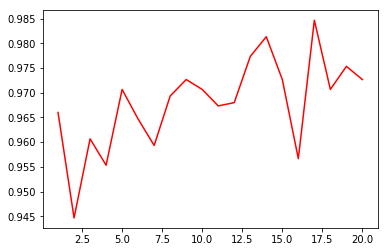

In [14]:
num = 20
bunch = 100
ans = np.zeros(num)
m = np.zeros(bunch)
for j in range(1, num + 1):
    for i in range(0, bunch):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=j)
        my_clf.fit(X_train, y_train)
        m[i] = my_clf.score(X_test, y_test)
    ans[j-1] = m.mean()
print(ans.argmax()+1)
plt.plot(range(1, num + 1), ans, 'red')
plt.show()

**MNIST**

In [15]:
mnist = fetch_mldata('MNIST original')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 2min 13s, sys: 738 ms, total: 2min 13s
Wall time: 2min 14s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 19.6 µs


In [20]:
%time clf.predict(X_test)

CPU times: user 2min 24s, sys: 20.3 ms, total: 2min 24s
Wall time: 2min 24s


array([1., 9., 3., 0., 6., 0., 5., 3., 8., 8., 3., 8., 4., 6., 3., 6., 8.,
       1., 2., 7., 4., 4., 9., 1., 8., 6., 6., 7., 2., 7., 1., 7., 1., 6.,
       6., 2., 1., 1., 3., 0., 7., 2., 3., 1., 1., 9., 6., 4., 2., 5., 5.,
       7., 8., 1., 3., 1., 6., 1., 4., 7., 8., 1., 2., 6., 1., 8., 9., 1.,
       2., 1., 9., 8., 2., 0., 4., 8., 5., 5., 6., 1., 7., 2., 5., 4., 6.,
       4., 1., 5., 1., 2., 1., 4., 5., 2., 8., 1., 1., 5., 1., 0., 9., 0.,
       2., 9., 9., 0., 0., 1., 3., 2., 5., 0., 2., 0., 4., 9., 6., 9., 9.,
       8., 9., 4., 5., 1., 7., 2., 2., 5., 1., 3., 7., 7., 6., 1., 4., 1.,
       4., 7., 8., 9., 5., 8., 0., 3., 7., 2., 8., 1., 0., 3., 9., 3., 9.,
       5., 7., 4., 9., 6., 6., 5., 2., 5., 7., 0., 9., 4., 7., 0., 5., 0.,
       9., 0., 1., 7., 5., 0., 2., 3., 0., 8., 0., 1., 2., 1., 7., 1., 5.,
       0., 2., 9., 0., 2., 8., 2., 1., 3., 3., 4., 5., 3., 4., 4., 8., 4.,
       3., 1., 3., 2., 7., 5., 2., 5., 9., 7., 7., 2., 9., 5., 4., 1., 7.,
       0., 1., 7., 4., 9.

In [21]:
%time my_clf.predict(X_test)

CPU times: user 1min 5s, sys: 1.19 s, total: 1min 6s
Wall time: 1min 7s


array([1, 9, 3, 0, 6, 0, 5, 3, 8, 8, 3, 8, 4, 6, 3, 6, 8, 1, 2, 7, 4, 4,
       9, 1, 8, 6, 6, 7, 2, 7, 1, 7, 1, 6, 6, 2, 1, 1, 3, 0, 7, 2, 3, 1,
       1, 9, 6, 4, 2, 5, 5, 7, 8, 1, 3, 1, 6, 1, 4, 7, 8, 1, 2, 6, 1, 8,
       9, 1, 2, 1, 9, 8, 2, 0, 4, 8, 5, 5, 6, 1, 7, 2, 5, 4, 6, 4, 1, 5,
       1, 2, 1, 4, 5, 2, 8, 1, 1, 5, 1, 0, 9, 0, 2, 9, 9, 0, 0, 1, 3, 2,
       5, 0, 2, 0, 4, 9, 6, 9, 9, 8, 9, 4, 5, 1, 7, 2, 2, 5, 1, 3, 7, 7,
       6, 1, 4, 1, 4, 7, 8, 9, 5, 8, 0, 3, 7, 2, 8, 1, 0, 3, 9, 3, 9, 5,
       7, 4, 9, 6, 6, 5, 2, 5, 7, 0, 9, 4, 7, 0, 5, 0, 9, 0, 1, 7, 5, 0,
       2, 3, 0, 8, 0, 1, 2, 1, 7, 1, 5, 0, 2, 9, 0, 2, 8, 2, 1, 3, 3, 4,
       5, 3, 4, 4, 8, 4, 3, 1, 3, 2, 7, 5, 2, 5, 9, 7, 7, 2, 9, 5, 4, 1,
       7, 0, 1, 7, 4, 9, 0, 6, 0, 8, 6, 2, 9, 1, 1, 1, 3, 4, 9, 6, 3, 3,
       0, 4, 3, 5, 1, 7, 0, 2, 4, 2, 7, 3, 1, 5, 2, 4, 2, 4, 3, 6, 9, 0,
       2, 7, 7, 6, 7, 9, 3, 8, 8, 3, 7, 0, 3, 4, 8, 4, 3, 3, 1, 4, 1, 7,
       3, 7, 8, 3, 2, 2, 7, 3, 8, 3, 4, 5, 7, 9, 4,

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 2min 12s, sys: 13.4 ms, total: 2min 12s
Wall time: 2min 13s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 51.5 s, sys: 843 ms, total: 52.3 s
Wall time: 52.6 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
clf.score(X_test, y_test)

0.9614285714285714

In [25]:
my_clf.score(X_test, y_test)

0.9614285714285714

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 2min 20s, sys: 774 ms, total: 2min 21s
Wall time: 2min 21s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2min 19s, sys: 674 ms, total: 2min 19s
Wall time: 2min 19s


In [30]:
%time clf.predict(X_test)

CPU times: user 2min 23s, sys: 32.3 ms, total: 2min 23s
Wall time: 2min 24s


array([5., 3., 5., 4., 0., 2., 0., 5., 2., 3., 9., 2., 1., 9., 1., 1., 3.,
       9., 7., 8., 4., 8., 4., 6., 1., 8., 6., 0., 0., 1., 1., 6., 8., 8.,
       2., 9., 0., 9., 7., 4., 8., 8., 2., 8., 6., 9., 2., 9., 8., 4., 7.,
       6., 0., 3., 6., 6., 2., 3., 3., 4., 0., 3., 7., 0., 6., 7., 9., 0.,
       5., 7., 6., 0., 5., 6., 2., 5., 1., 3., 1., 3., 4., 3., 2., 1., 4.,
       1., 4., 6., 6., 1., 1., 5., 4., 0., 2., 8., 2., 0., 5., 0., 7., 0.,
       6., 1., 8., 3., 5., 6., 7., 8., 0., 4., 3., 6., 4., 7., 7., 5., 9.,
       2., 5., 2., 3., 3., 3., 7., 1., 6., 8., 5., 3., 8., 9., 9., 9., 4.,
       3., 3., 0., 3., 5., 0., 6., 4., 6., 2., 0., 3., 1., 0., 8., 1., 0.,
       4., 9., 0., 7., 6., 1., 6., 6., 3., 1., 2., 1., 3., 6., 7., 2., 6.,
       7., 6., 2., 5., 0., 8., 0., 9., 1., 0., 8., 3., 2., 3., 8., 1., 5.,
       2., 5., 9., 0., 9., 0., 6., 6., 2., 8., 2., 0., 4., 3., 6., 2., 7.,
       6., 5., 1., 9., 1., 1., 1., 7., 4., 4., 4., 8., 8., 7., 7., 9., 1.,
       7., 3., 4., 5., 8.

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 53s, sys: 12.7 ms, total: 1min 53s
Wall time: 1min 53s


array([5, 3, 5, 4, 0, 2, 0, 5, 2, 3, 9, 2, 1, 9, 1, 1, 3, 9, 7, 8, 4, 8,
       4, 6, 1, 8, 6, 0, 0, 1, 1, 6, 8, 8, 2, 9, 0, 9, 7, 4, 8, 8, 2, 8,
       6, 9, 2, 9, 8, 4, 7, 6, 0, 3, 6, 6, 2, 3, 3, 4, 0, 3, 7, 0, 6, 7,
       9, 0, 5, 7, 6, 0, 5, 6, 2, 5, 1, 3, 1, 3, 4, 3, 2, 1, 4, 1, 4, 6,
       6, 1, 1, 5, 4, 0, 2, 8, 2, 0, 5, 0, 7, 0, 6, 1, 8, 3, 5, 6, 7, 8,
       0, 4, 3, 6, 4, 7, 7, 5, 9, 2, 5, 2, 3, 3, 3, 7, 1, 6, 8, 5, 3, 8,
       9, 9, 9, 4, 3, 3, 0, 3, 5, 0, 6, 4, 6, 2, 0, 3, 1, 0, 8, 1, 0, 4,
       9, 0, 7, 6, 1, 6, 6, 3, 1, 2, 1, 3, 6, 7, 2, 6, 7, 6, 2, 5, 0, 8,
       0, 9, 1, 0, 8, 3, 2, 3, 8, 1, 5, 2, 5, 9, 0, 9, 0, 6, 6, 2, 8, 2,
       0, 4, 3, 6, 2, 7, 6, 5, 1, 9, 1, 1, 1, 7, 4, 4, 4, 8, 8, 7, 7, 9,
       1, 7, 3, 4, 5, 8, 5, 1, 5, 7, 1, 7, 1, 4, 1, 1, 6, 0, 2, 6, 7, 7,
       7, 2, 1, 2, 5, 2, 1, 7, 3, 3, 2, 5, 9, 9, 9, 0, 3, 3, 9, 7, 5, 7,
       3, 4, 0, 7, 3, 4, 0, 0, 7, 2, 6, 6, 7, 0, 2, 5, 5, 9, 8, 6, 3, 0,
       3, 9, 5, 9, 9, 7, 2, 4, 2, 1, 1, 8, 4, 4, 5,

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 2min 23s, sys: 13.2 ms, total: 2min 23s
Wall time: 2min 24s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 52s, sys: 97.7 ms, total: 1min 52s
Wall time: 1min 53s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9728571428571429

In [35]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 5

In [36]:
# seaborn - надстройка над matplotlib для визуализации статистических данных
# matplotlib - основная библиотека для построения графиков
# train_test_split - библиотека для разбиения данных для обучения
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - создание пайплайнов - конвееров
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормализация данных
# ClassifierMixin - базовый класс класификаторов sclearn
# NeighborsBase - базовый класс для алгоритмов ближайших соседей 
# KNeighborsMixin - класс реализующий поиск ближайших соседей
# SupervisedIntegerMixin - базовый класс для создания алгоритмов обучения с учителем